(904, 64)


[ WARN:0@1.702] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('Dataset/New Datasets/20231016_New_Datasets/Difficult_Trajectory/left_rescaled/cam_0.jpeg'): can't open/read file: check file path/integrity


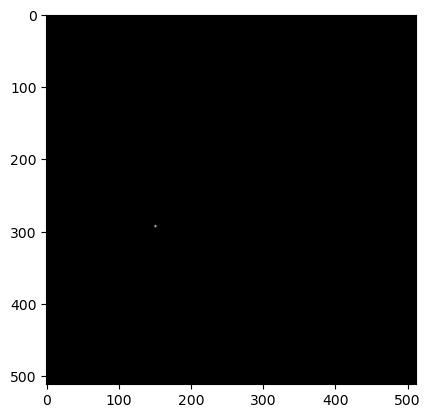

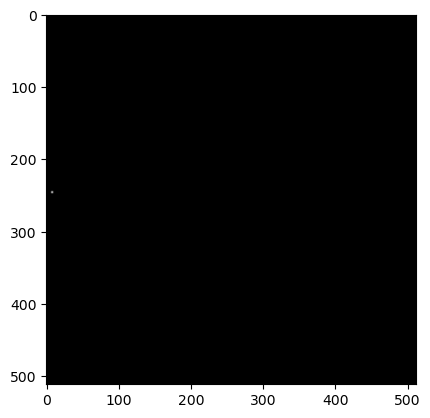

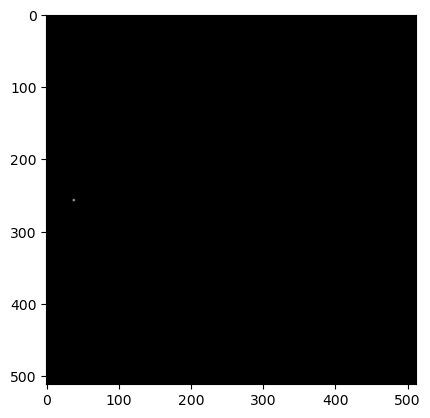

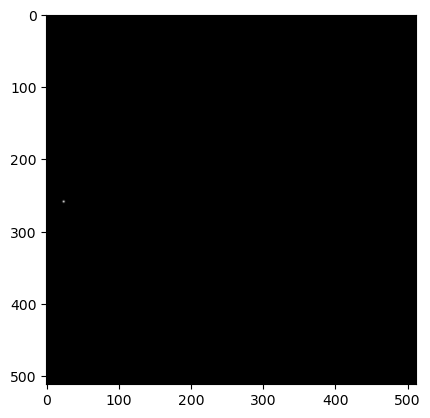

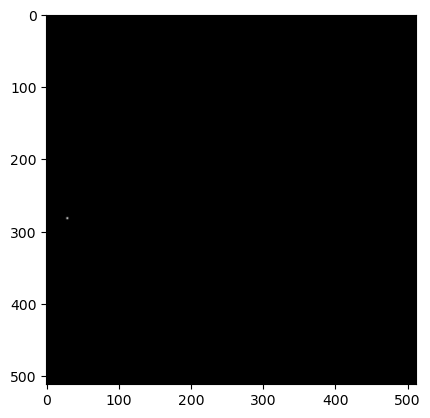

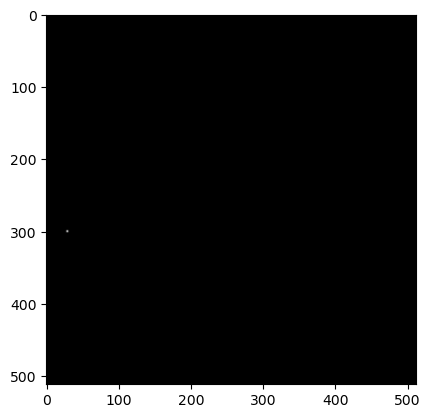

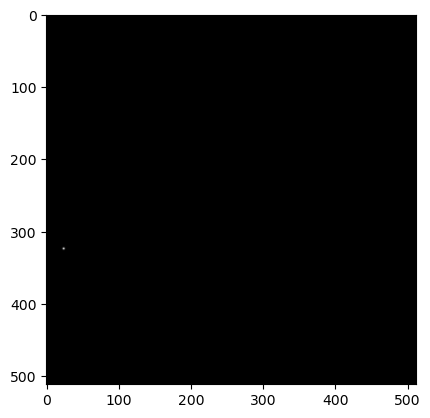

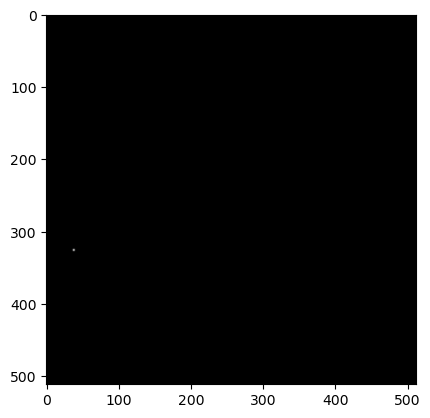

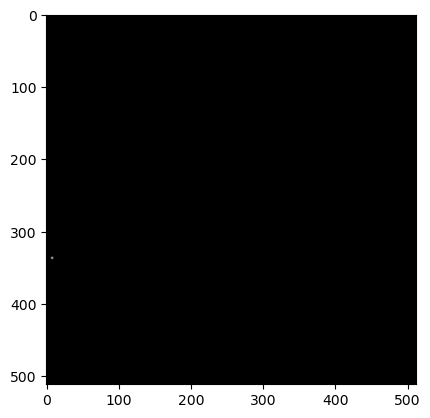

TypeError: Image data of dtype object cannot be converted to float

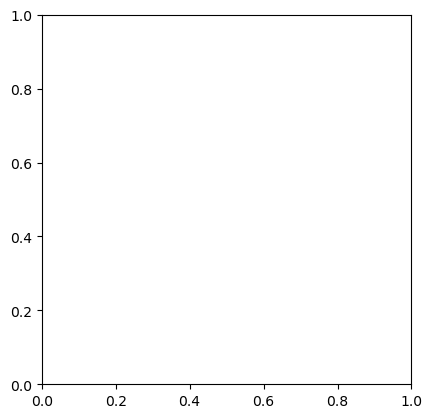

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from Data_preparation.heatmaps import createHeatmap
from projection_mtx import threeD_points
from CAD_transf import get_points
landmark_nr = 9

db = pd.read_csv("../Test/trajectories/Difficult_Trajectory2.csv")

#db = db[(db["tray_nr"] == 'A') & (db["camera"] == 'leftcam')]
print(db.shape)


image_name = db["image_name"].values[0]
image_path = db["image_path"].values[0]
img = cv2.imread(image_path)

heat0 = np.zeros((512, 512))

for i in range(0, landmark_nr):
    heatmap = createHeatmap((db[f'LDM{i}x'].values[0],db[f'LDM{i}y'].values[0]), db[f'VP{i}'].values[0], 512, 512)
    plt.imshow(heatmap, cmap='gray')
    plt.show()
    #SET GRAYSCALE
    #cv2.imwrite(f"../Latex/images/heatmap{i}_400_16.png", heatmap*255)
    heat0 += heatmap
    if(db[f'VP{i}'].values[0] == 1):
        img = cv2.circle(img, (int(db[f'LDM{i}x'].values[0]), int(db[f'LDM{i}y'].values[0])), 3, (0, 0, 255), -1)
    #print(db[f'LDM{i}x'].values[0], db[f'LDM{i}y'].values[0])

plt.imshow(img)
plt.show()
#cv2.imwrite(f"../Latex/images/Landmarks_400_16.png", img)
plt.imshow(heat0, cmap='gray')
plt.show()
#cv2.imwrite(f"../Latex/images/Heatmaps_400_16.png", heat0*255)


In [23]:
pos = [-db[['x', 'y', 'z']].values[:2]]
rot = [db[['roll', 'pitch', 'yaw']].values[:2]]
print(pos, rot)


[array([[  53.47 ,  -20.432, -204.827],
       [  53.472,  -20.432, -204.622]])] [array([[-0.   , 15.   , -0.   ],
       [-0.   , 14.983, -0.   ]])]


In [31]:
points = np.array(get_points())*100
points

array([[  0. ,   0. ,  12.5],
       [-82.2,  25.1,   1.7],
       [-65.9,  19.2,   1.7],
       [-73.3,  18. ,   1.7],
       [-70.8,   5. ,   1.7],
       [-70.8,  -5. ,   1.7],
       [-73.3, -18. ,   1.7],
       [-65.8, -19.2,   1.7],
       [-82.2, -25.1,   1.7]])